In [30]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [31]:
img = cv2.imread("/home/ubuntu/workspace/boxs.jpg")
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

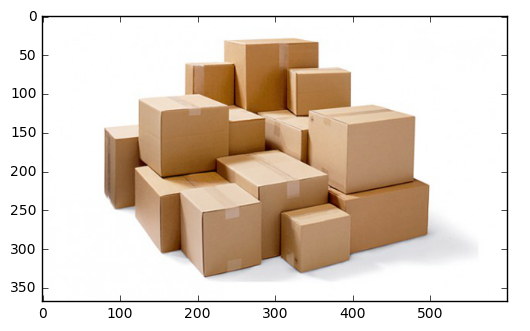

In [32]:
plt.imshow(imgRGB)
plt.show()

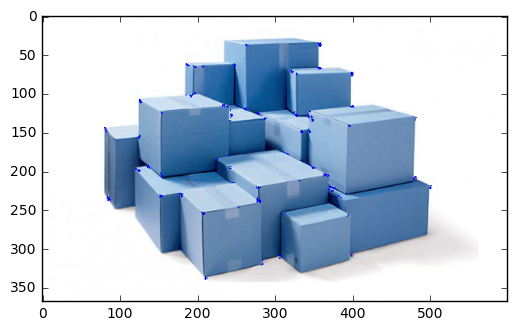

In [22]:
# Harris corners detector

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.05)
img[dst>0.01*dst.max()]=[0,0,255]

plt.imshow(img)
plt.show()

[[[357  66]]

 [[192 102]]

 [[357  34]]

 [[123 200]]

 [[274 239]]

 [[279 129]]

 [[207 103]]

 [[141 198]]

 [[287 219]]

 [[346 133]]]
357 66
192 102
357 34
123 200
274 239
279 129
207 103
141 198
287 219
346 133


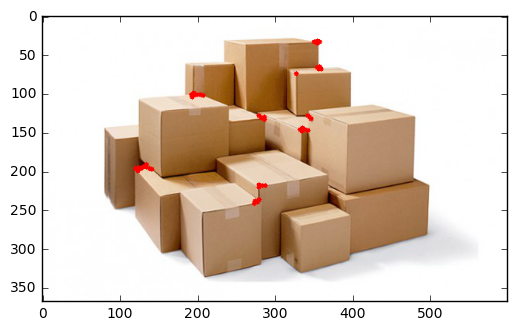

(<matplotlib.image.AxesImage at 0x7fca99a19c18>, None)

In [38]:
# Shi-Tomasi Corner Detector
# detects 25 strongest corners, 0.01 - minimum quality of corner below which everyone is rejected
# 10 - minimum euclidean distance between corners detected

gray = cv2.cvtColor(imgRGB,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,10,0.01,10)
corners = np.int0(corners)
print(corners)

for i in corners:
    x,y = i.ravel()
    print(x,y)
    cv2.circle(imgRGB,(x,y),3,255,-1)
    
plt.imshow(imgRGB),plt.show()

In [41]:
x = np.uint8([250])
y = np.uint8([10])
print(cv2.add(x,y)) #250+10=260 -> 255
print(x+y) #250+10=260 -> 260 % 256 = 4

[[255]]
[4]


In [45]:
img1 = cv2.imread('/home/ubuntu/workspace/boxs.jpg')
img2 = cv2.imread('/home/ubuntu/workspace/rsp.jpg')

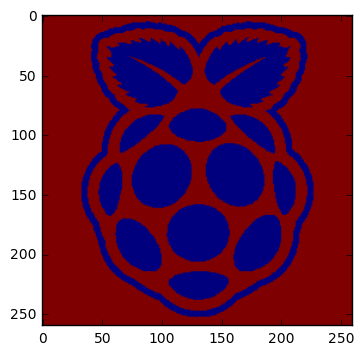

(<matplotlib.image.AxesImage at 0x7fca98f27be0>, None)

In [82]:
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols] #region of interest

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 80, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
plt.imshow(mask_inv),plt.show()

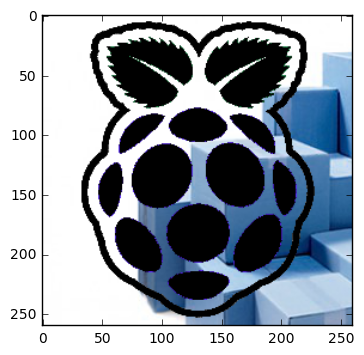

(<matplotlib.image.AxesImage at 0x7fca98e8f0f0>, None)

In [83]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
plt.imshow(img1_bg),plt.show()

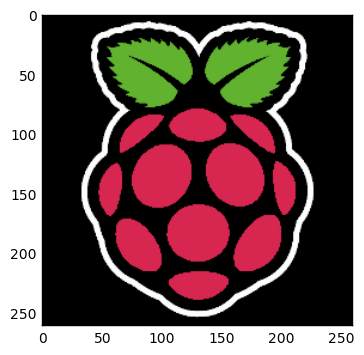

(<matplotlib.image.AxesImage at 0x7fca98e6ddd8>, None)

In [84]:
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
plt.imshow(cv2.cvtColor(img2_fg,cv2.COLOR_BGR2RGB)),plt.show()

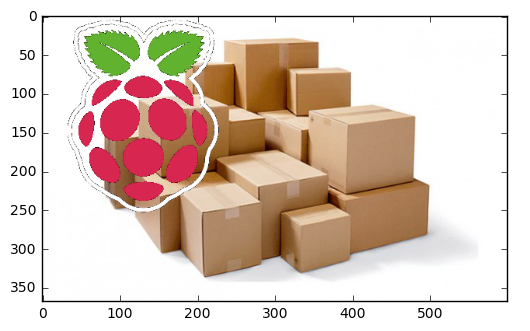

(<matplotlib.image.AxesImage at 0x7fca98dceac8>, None)

In [85]:
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)),plt.show()

In [57]:
cv2.imwrite( "result.jpg", img1)

True